In [1]:
#Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import os
import gc

In [3]:
#Ingestion address


train=pd.read_csv(r"C:\Users\aksha\notebooks\data\application_train.csv")
test=pd.read_csv(r"C:\Users\aksha\notebooks\data\application_test.csv")
bureau=pd.read_csv(r"C:\Users\aksha\notebooks\data\bureau.csv")
bureau_bal=pd.read_csv(r"C:\Users\aksha\notebooks\data\bureau_balance.csv")
cc_bal=pd.read_csv(r"C:\Users\aksha\notebooks\data\credit_card_balance.csv")
payments=pd.read_csv(r"C:\Users\aksha\notebooks\data\installments_payments.csv")
cash=pd.read_csv(r"C:\Users\aksha\notebooks\data\POS_CASH_balance.csv")
prev_app=pd.read_csv(r"C:\Users\aksha\notebooks\data\previous_application.csv")

In [4]:
#file=[train,test,bureau,bureau_bal,cc_bal,payments,cash,prev_app]
print("application_train -  rows:",train.shape[0]," columns:", train.shape[1])
print("application_test -  rows:",test.shape[0]," columns:", test.shape[1])
print("bureau -  rows:",bureau.shape[0]," columns:", bureau.shape[1])
print("bureau_balance -  rows:",bureau_bal.shape[0]," columns:", bureau_bal.shape[1])
print("credit_card_balance -  rows:",cc_bal.shape[0]," columns:", cc_bal.shape[1])
print("installments_payments -  rows:",payments.shape[0]," columns:", payments.shape[1])
print("previous_application -  rows:",prev_app.shape[0]," columns:", prev_app.shape[1])
print("POS_CASH_balance -  rows:",cash.shape[0]," columns:", cash.shape[1])

application_train -  rows: 307511  columns: 122
application_test -  rows: 48744  columns: 121
bureau -  rows: 1716428  columns: 17
bureau_balance -  rows: 27299925  columns: 3
credit_card_balance -  rows: 3840312  columns: 23
installments_payments -  rows: 13605401  columns: 8
previous_application -  rows: 1670214  columns: 37
POS_CASH_balance -  rows: 10001358  columns: 8


Functions for Analysis

In [5]:
#A
def findnan(df):
        # Total missing values
        val = df.isnull().sum()
        
        # Percentage of missing values
        val_percent = 100 * df.isnull().sum() / len(df)
        ty=df.dtypes
        
        # Make a table with the results
        table = pd.concat([val, val_percent, ty], axis=1)
        
        # Rename the columns
        table = table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'Data Type'})
        
        # Sort the table by percentage of missing descending
        table = table[
            table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print(df.shape)
        print(df.columns)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(table.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return table

In [6]:
def des(df):
    cols=df.columns
    for col in cols:
        print(df[col].describe())

In [7]:
#A

def kde_target(var_name, df):
    
    # Calculate the correlation coefficient between the new variable and the target
    corr = df['TARGET'].corr(df[var_name])
    
    # Calculate medians for repaid vs not repaid
    avg_repaid = df.loc[df['TARGET'] == 0, var_name].median()
    avg_not_repaid = df.loc[df['TARGET'] == 1, var_name].median()
    
    plt.figure(figsize = (12, 6))
    
    # Plot the distribution for target == 0 and target == 1
    sns.kdeplot(df.loc[df['TARGET'] == 0, var_name], label = 'TARGET == 0')
    sns.kdeplot(df.loc[df['TARGET'] == 1, var_name], label = 'TARGET == 1')
    
    # label the plot
    plt.xlabel(var_name); plt.ylabel('Density'); plt.title('%s Distribution' % var_name)
    plt.legend();
    
    # print out the correlation
    print('The correlation between %s and the TARGET is %0.4f' % (var_name, corr))
    # Print out average values
    print('Median value for loan that was not repaid = %0.4f' % avg_not_repaid)
    print('Median value for loan that was repaid =     %0.4f' % avg_repaid)

TARGET
0    282686
1     24825
Name: count, dtype: int64


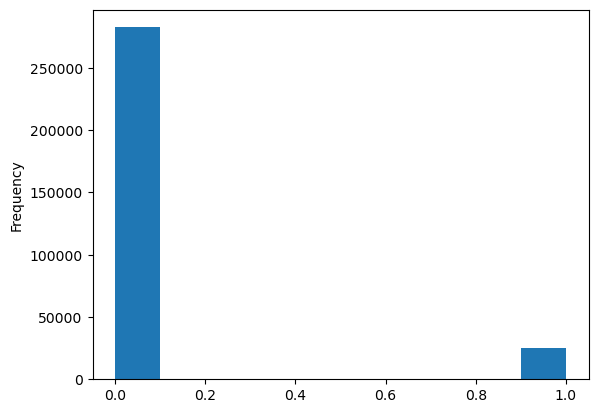

In [8]:
print(train['TARGET'].value_counts())
train['TARGET'].astype(int).plot.hist();

In [9]:
findnan(train)
des(train)

(307511, 122)
Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)
Your selected dataframe has 122 columns.
There are 67 columns that have missing values.
count    307511.000000
mean     278180.518577
std      102790.175348
min      100002.000000
25%      189145.500000
50%      278202.000000
75%      367142.500000
max      456255.000000
Name: SK_ID_CURR, dtype: float64
count    307511.000000
mean          0.080729
std           0.272419
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000


count    127568.000000
mean          0.088442
std           0.082438
min           0.000000
25%           0.044200
50%           0.076300
75%           0.112200
max           1.000000
Name: BASEMENTAREA_AVG, dtype: float64
count    157504.000000
mean          0.977735
std           0.059223
min           0.000000
25%           0.976700
50%           0.981600
75%           0.986600
max           1.000000
Name: YEARS_BEGINEXPLUATATION_AVG, dtype: float64
count    103023.000000
mean          0.752471
std           0.113280
min           0.000000
25%           0.687200
50%           0.755200
75%           0.823200
max           1.000000
Name: YEARS_BUILD_AVG, dtype: float64
count    92646.000000
mean         0.044621
std          0.076036
min          0.000000
25%          0.007800
50%          0.021100
75%          0.051500
max          1.000000
Name: COMMONAREA_AVG, dtype: float64
count    143620.000000
mean          0.078942
std           0.134576
min           0.000000
25%           0.

count             153214
unique                 3
top       block of flats
freq              150503
Name: HOUSETYPE_MODE, dtype: object
count    159080.000000
mean          0.102547
std           0.107462
min           0.000000
25%           0.041200
50%           0.068800
75%           0.127600
max           1.000000
Name: TOTALAREA_MODE, dtype: float64
count     151170
unique         7
top        Panel
freq       66040
Name: WALLSMATERIAL_MODE, dtype: object
count     161756
unique         2
top           No
freq      159428
Name: EMERGENCYSTATE_MODE, dtype: object
count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64
count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_3

In [10]:
findnan(test)
des(test)

(48744, 121)
Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=121)
Your selected dataframe has 121 columns.
There are 64 columns that have missing values.
count     48744.000000
mean     277796.676350
std      103169.547296
min      100001.000000
25%      188557.750000
50%      277549.000000
75%      367555.500000
max      456250.000000
Name: SK_ID_CURR, dtype: float64
count          48744
unique             2
top       Cash loans
freq           48305
Name: NAME_CONTRACT_TYPE, dtype: object
count     48744
unique       

count    48744.000000
mean     -1077.766228
std        878.920740
min      -4361.000000
25%      -1766.250000
50%       -863.000000
75%       -363.000000
max          0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64
count    48744.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: FLAG_DOCUMENT_2, dtype: float64
count    48744.000000
mean         0.786620
std          0.409698
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: FLAG_DOCUMENT_3, dtype: float64
count    48744.000000
mean         0.000103
std          0.010128
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: FLAG_DOCUMENT_4, dtype: float64
count    48744.000000
mean         0.014751
std          0.120554
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
N

Dropping Features from train and test to reduce feature size. As per the problem domain, the features selected for dropping do not weigh in as much on the factor if a client will default on their loan payment or not.

In [11]:
dropfeatures = ['FLAG_OWN_CAR','NAME_TYPE_SUITE','NAME_FAMILY_STATUS','OWN_CAR_AGE','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG','COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG','LANDAREA_AVG','LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG','APARTMENTS_MODE','BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE','FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE','APARTMENTS_MEDI','BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI','COMMONAREA_MEDI','ELEVATORS_MEDI','ENTRANCES_MEDI','FLOORSMAX_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI','FONDKAPREMONT_MODE','HOUSETYPE_MODE','TOTALAREA_MODE','EMERGENCYSTATE_MODE','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']
train1=train.drop(columns=dropfeatures)
test1=test.drop(columns=dropfeatures)
print(train1.shape)
print(test1.shape)


del train, test
gc.collect()

(307511, 46)
(48744, 45)


346

In [12]:
findnan(prev_app)

(1670214, 37)
Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')
Your selected dataframe has 37 columns.
There are 16 columns that have missing valu

,Missing Values,% of Total Values,Data Type
RATE_INTEREST_PRIMARY,1664263,99.6,float64
RATE_INTEREST_PRIVILEGED,1664263,99.6,float64
AMT_DOWN_PAYMENT,895844,53.6,float64
RATE_DOWN_PAYMENT,895844,53.6,float64
NAME_TYPE_SUITE,820405,49.1,object
DAYS_FIRST_DRAWING,673065,40.3,float64
DAYS_FIRST_DUE,673065,40.3,float64
DAYS_LAST_DUE_1ST_VERSION,673065,40.3,float64
DAYS_LAST_DUE,673065,40.3,float64
DAYS_TERMINATION,673065,40.3,float64


Similarly, removing features from Previous Application dataset 

In [13]:
dropfeatures_prevapp = ['NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','PRODUCT_COMBINATION']
prev_app1=prev_app.drop(columns=dropfeatures_prevapp)
print(prev_app1.shape)

del prev_app
gc.collect()

(1670214, 33)


0

#### Data Transformation for train and test

Analyze all important domain "DAY" based features

The correlation between DAYS_BIRTH and the TARGET is -0.0782
Median value for loan that was not repaid = 14282.0000
Median value for loan that was repaid =     15877.0000


count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

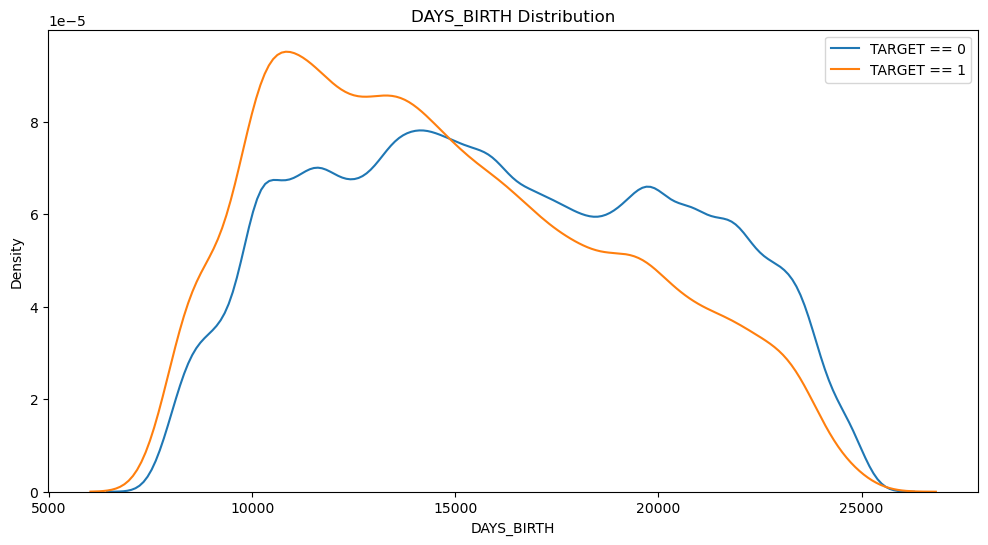

In [16]:
#Days birth analysis

train1['DAYS_BIRTH'] = abs(train1['DAYS_BIRTH'])

kde_target('DAYS_BIRTH', train1)

(train1['DAYS_BIRTH'] / 365).describe()

In [17]:
#Age bins
#Data Transformation for train and test

age_data = train1[['DAYS_BIRTH']]
train1['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / -365

train1['YEARS_BINNED'] = pd.cut(train1['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
#train1.head(10)

age_testdata = test1[['DAYS_BIRTH']]
test1['YEARS_BIRTH'] = age_testdata['DAYS_BIRTH'] / -365

test1['YEARS_BINNED'] = pd.cut(test1['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))

del age_data, age_testdata
gc.collect()

The correlation between DAYS_EMPLOYED and the TARGET is -0.0470
Median value for loan that was not repaid = 1458.0000
Median value for loan that was repaid =     2304.0000
0
The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


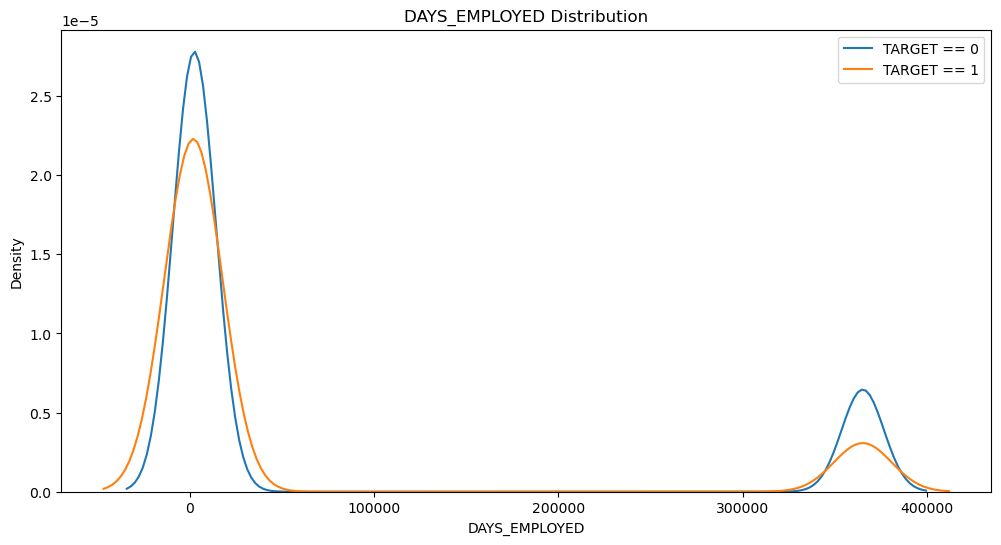

In [18]:
#days employed analysis

train1['DAYS_EMPLOYED'] = abs(train1['DAYS_EMPLOYED'])

kde_target('DAYS_EMPLOYED', train1)

(train1['DAYS_EMPLOYED'] / 365).describe()

print(train1['DAYS_EMPLOYED'].isnull().sum())

anom = train1[train1['DAYS_EMPLOYED'] == 365243]
non_anom = train1[train1['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

In [19]:
#Data Transforation for training and testing
# Create an anomalous flag column
train1['DAYS_EMPLOYED_ANOM'] = train1["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
train1['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)


test1['DAYS_EMPLOYED_ANOM'] = test1["DAYS_EMPLOYED"] == 365243
test1["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (test1["DAYS_EMPLOYED_ANOM"].sum(), len(test1)))



There are 9274 anomalies in the test data out of 48744 entries


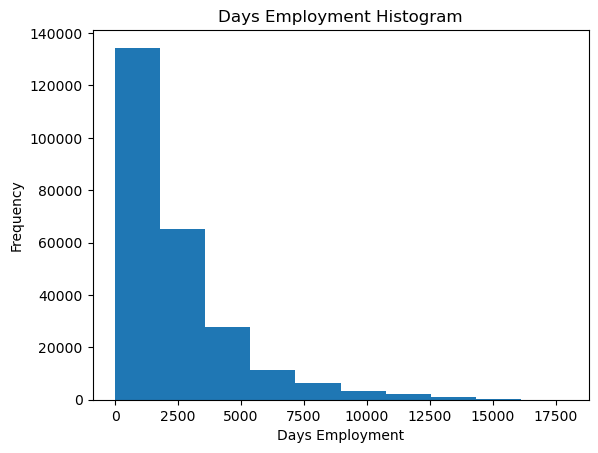

In [21]:
train1['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

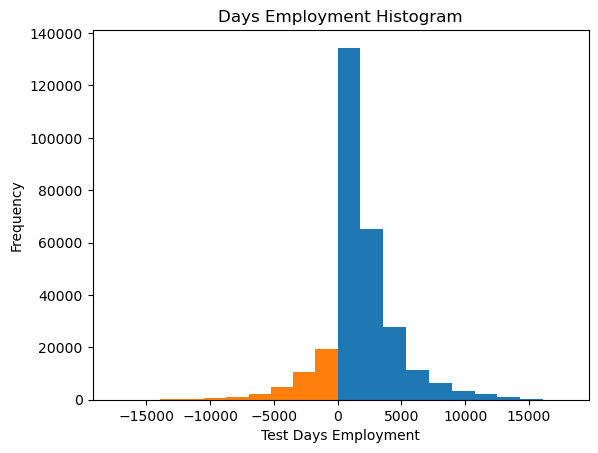

In [20]:
test1['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Test Days Employment');

In [22]:
del anom, non_anom
gc.collect()

14676

The correlation between DAYS_ID_PUBLISH and the TARGET is -0.0515
Median value for loan that was not repaid = 2797.0000
Median value for loan that was repaid =     3295.0000


count    307511.000000
mean          8.203294
std           4.135481
min           0.000000
25%           4.712329
50%           8.915068
75%          11.778082
max          19.717808
Name: DAYS_ID_PUBLISH, dtype: float64

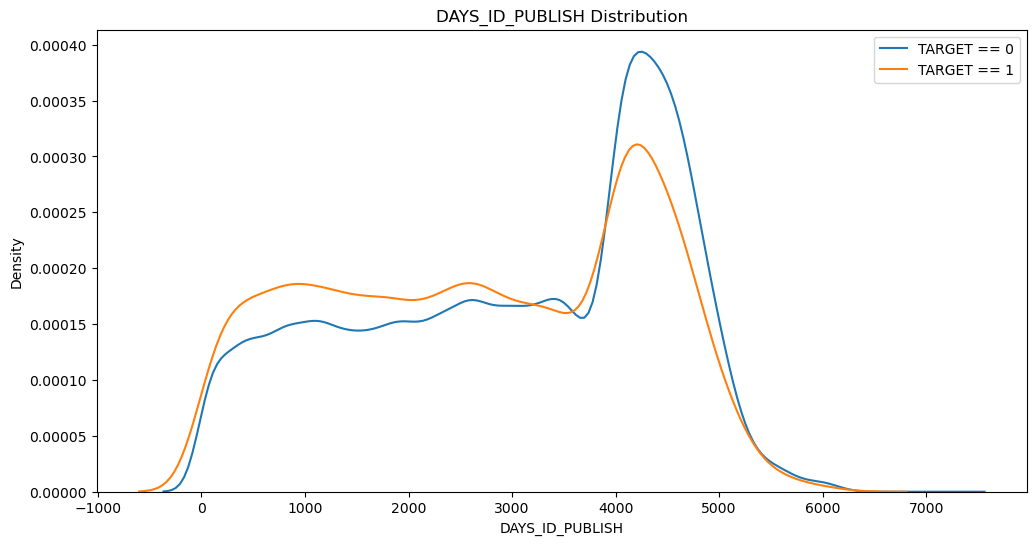

In [23]:
#Days id publish analysis

train1['DAYS_ID_PUBLISH'] = abs(train1['DAYS_ID_PUBLISH'])

kde_target('DAYS_ID_PUBLISH', train1)

(train1['DAYS_ID_PUBLISH'] / 365).describe()

The correlation between DAYS_REGISTRATION and the TARGET is -0.0420
Median value for loan that was not repaid = 4056.0000
Median value for loan that was repaid =     4544.0000


count    307511.000000
mean         13.660604
std           9.651743
min           0.000000
25%           5.506849
50%          12.339726
75%          20.491781
max          67.594521
Name: DAYS_REGISTRATION, dtype: float64

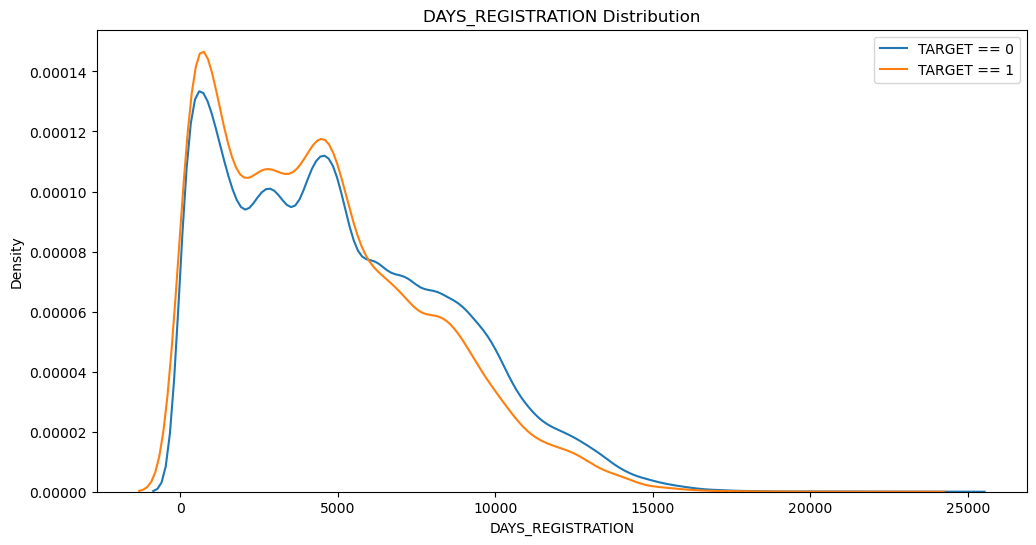

In [24]:
#Days registration analysis

train1['DAYS_REGISTRATION'] = abs(train1['DAYS_REGISTRATION'])

kde_target('DAYS_REGISTRATION', train1)

(train1['DAYS_REGISTRATION'] / 365).describe()

In [25]:
# Groupby the client id (SK_ID_CURR), count the number of previous loans, and rename the column
previous_loan_counts = bureau.groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count().rename(columns = {'SK_ID_BUREAU': 'previous_loan_counts'})
previous_loan_counts.head()

,SK_ID_CURR,previous_loan_counts
0,100001,7
1,100002,8
2,100003,4
3,100004,2
4,100005,3


In [26]:
#Compute previous loan applications from bureau and add it to train and test set before merging other datasets


#Merging cell
train1 = train1.merge(previous_loan_counts, on = 'SK_ID_CURR', how = 'left')

# Fill the missing values with 0 
train1['previous_loan_counts'] = train1['previous_loan_counts'].fillna(0)

#Merging cell
test1 = test1.merge(previous_loan_counts, on = 'SK_ID_CURR', how = 'left')

# Fill the missing values with 0 
test1['previous_loan_counts'] = test1['previous_loan_counts'].fillna(0)

del previous_loan_counts
gc.collect()

11024

The correlation between previous_loan_counts and the TARGET is -0.0100
Median value for loan that was not repaid = 3.0000
Median value for loan that was repaid =     4.0000


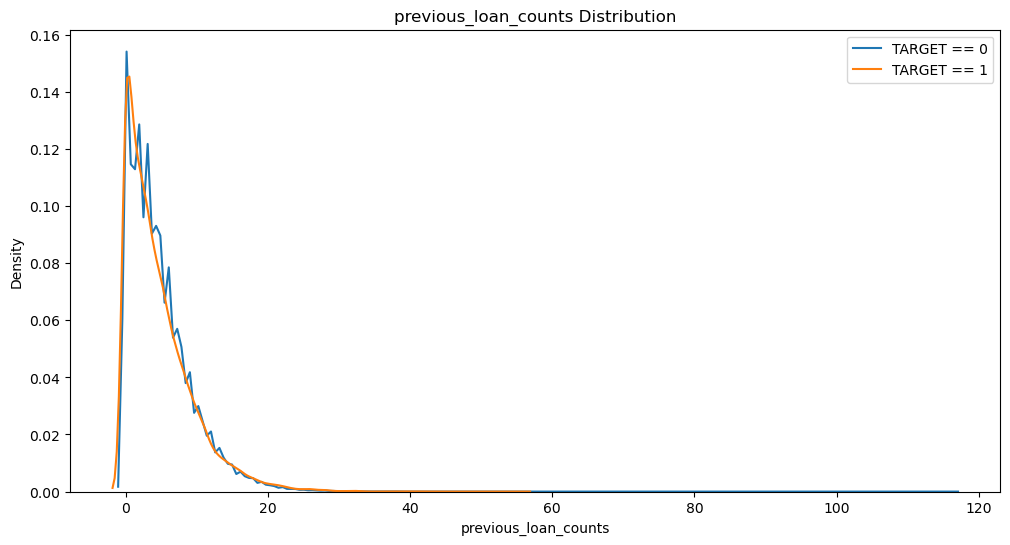

In [27]:
kde_target('previous_loan_counts', train1)

Define Aggregating functions for other dataset transformation before grouping them together into the training set

In [28]:
#data transformation

def agg_numerical(df, parent_var, df_name):
 # Remove parent var derivative features
    for col in df:
        if col != parent_var and 'SK_ID' in col:
            df = df.drop(columns = col)
            
    # Select numerical features
    parent_ids = df[parent_var].copy()
    numeric_df = df.select_dtypes('number').copy()
    numeric_df[parent_var] = parent_ids

    # Group by the parent variable and calculate the statistics
    agg = numeric_df.groupby(parent_var).agg(['count', 'mean', 'max', 'min', 'sum'])

    # Need to create new column names based on stats
    columns = []

    # Iterate through the variables names
    for var in agg.columns.levels[0]:
        if var != parent_var:
            # Iterate through the stat names
            for stat in agg.columns.levels[1]:
                # Make a new column name for the variable and stat
                columns.append('%s_%s_%s' % (df_name, var, stat))
    
    agg.columns = columns
    
    # Removing columns with all redundant values
    _, idx = np.unique(agg, axis = 1, return_index=True)
    agg = agg.iloc[:, idx]
    
    return agg

In [29]:
#data transformation

def agg_categorical(df, parent_var, df_name):
    # Select categorical columns
    categorical = pd.get_dummies(df.select_dtypes('object'))

    categorical[parent_var] = df[parent_var]

    # Groupby the parent var and calculate the sum count and mean
    categorical = categorical.groupby(parent_var).agg(['sum', 'count', 'mean'])
    
    column_names = []
    
    # Iterate through the columns in level 0
    for var in categorical.columns.levels[0]:
        # Iterate through the stats in level 1
        for stat in ['sum', 'count', 'mean']:
            # Make a new column name
            column_names.append('%s_%s_%s' % (df_name, var, stat))
    
    categorical.columns = column_names
    
    # Remove duplicate columns by values
    _, idx = np.unique(categorical, axis = 1, return_index = True)
    categorical = categorical.iloc[:, idx]
    
    return categorical

In [30]:
#Data transformation

def agg_client(df, group_vars, df_names):
    # Numerical columns
    df_agg = agg_numerical(df, parent_var = group_vars[0], df_name = df_names[0])
    
    # Categorical variables
    if any(df.dtypes == 'category' or df.dtypes == 'object'):
    
        # Count the categorical columns
        df_counts = agg_categorical(df, parent_var = group_vars[0], df_name = df_names[0])

        # Merge the numeric and categorical
        df_by_loan = df_counts.merge(df_agg, on = group_vars[0], how = 'outer')

        gc.enable()
        del df_agg, df_counts
        gc.collect()

        # Merge to get the client id in dataframe
        df_by_loan = df_by_loan.merge(df[[group_vars[0], group_vars[1]]], on = group_vars[0], how = 'left')

        # Remove the loan id
        df_by_loan = df_by_loan.drop(columns = [group_vars[0]])

        # Aggregate numeric stats by column
        df_by_client = agg_numerical(df_by_loan, parent_var = group_vars[1], df_name = df_names[1])

        
    # No categorical variables
    else:
        # Merge to get the client id in dataframe
        df_by_loan = df_agg.merge(df[[group_vars[0], group_vars[1]]], on = group_vars[0], how = 'left')
        
        gc.enable()
        del df_agg
        gc.collect()
        
        # Remove the loan id
        df_by_loan = df_by_loan.drop(columns = [group_vars[0]])
        
        # Aggregate numeric stats by column
        df_by_client = agg_numerical(df_by_loan, parent_var = group_vars[1], df_name = df_names[1])
        
    # Memory management
    gc.enable()
    del df, df_by_loan
    gc.collect()

    return df_by_client

Bureau and Bureau Balance Data Transformations

In [32]:
findnan(bureau)


(1716428, 17)
Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object')
Your selected dataframe has 17 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values,Data Type
AMT_ANNUITY,1226791,71.5,float64
AMT_CREDIT_MAX_OVERDUE,1124488,65.5,float64
DAYS_ENDDATE_FACT,633653,36.9,float64
AMT_CREDIT_SUM_LIMIT,591780,34.5,float64
AMT_CREDIT_SUM_DEBT,257669,15.0,float64
DAYS_CREDIT_ENDDATE,105553,6.1,float64
AMT_CREDIT_SUM,13,0.0,float64


In [33]:
findnan(bureau_bal)

(27299925, 3)
Index(['SK_ID_BUREAU', 'MONTHS_BALANCE', 'STATUS'], dtype='object')
Your selected dataframe has 3 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values,Data Type


Bureau Balance main key is bureau id, which we will merge with current id from Bureau dataset
1.Calculate numeric stats grouping by each loan
2.Make value counts of each categorical variable grouping by loan 
3.Merge the stats and the value counts on the loans 
4.Calculate numeric stats for the resulting dataframe grouping by the client id
The final resulting dataframe has one row for each client, with statistics calculated for all of their loans with monthly balance information.


In [ ]:
bureau_num=agg_numerical(bureau,'SK_ID_CURR','bureau')
bureau_cat=agg_categorical(bureau,'SK_ID_CURR','bureau')

In [ ]:
bb_num=agg_numerical(bureau_bal,'SK_ID_BUREAU','bureau_bal')
bb_cat=agg_categorical(bureau_bal,'SK_ID_BUREAU','bureau_bal')

# Dataframe bureau balance grouped by the loan
bb_by_curr = bb_num.merge(bb_cat, right_index = True, left_on = 'SK_ID_BUREAU', how = 'outer')

# Merge to include the SK_ID_CURR
bb_by_curr = bb_by_curr.merge(bureau[['SK_ID_BUREAU', 'SK_ID_CURR']], on = 'SK_ID_BUREAU', how = 'left')

# Aggregate the stats for each client
bb_curr=bb_by_curr.drop(columns = ['SK_ID_BUREAU'])
bb_by_client = agg_numerical(bb_curr, 'SK_ID_CURR', 'client')